In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
print(recent_date)

('2017-08-23',)


In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017,8,22) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
previous_precipitation = session.query(Measurement.date,Measurement.prcp).\
filter(Measurement.date > previous_year).\
order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_scores = pd.DataFrame(data=previous_precipitation)
precipitation_scores.set_index("date", inplace=True)
precipitation_scores.rename(columns={"prcp":"Precipitation 8/23/2016 - 8/23/2017"}, inplace=True)

# Sort the dataframe by date
precipitation_scores.sort_index(ascending=True)
precipitation_scores.head()

,Precipitation 8/23/2016 - 8/23/2017
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


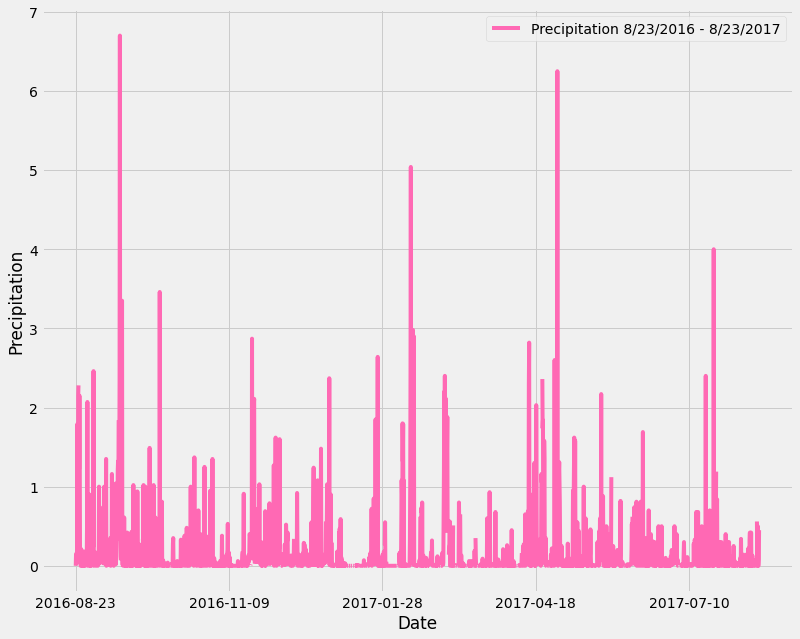

In [33]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_scores.plot(figsize = (12, 10), color='hotpink')
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.savefig('precipitation_analysis.png')

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_scores.describe()

,Precipitation 8/23/2016 - 8/23/2017
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
station=session.query(func.count(Station.station)).all()
station_count = station[0]
station_count

(9,)

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for station in active_stations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

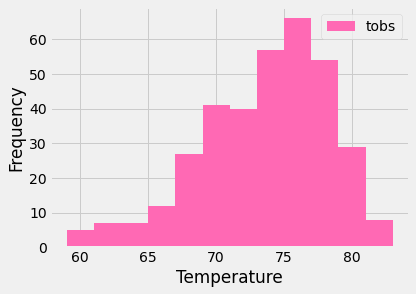

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
previous_year = dt.date(2017,8,22) - dt.timedelta(days=365)

temp_observation = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= previous_year).all()
df = pd.DataFrame(temp_observation, columns=['tobs'])
df.plot.hist(bins=12, color='hotpink')
plt.tight_layout()
plt.xlabel("Temperature")
plt.savefig('temperature_observation.png')

In [ ]:
# Close session

In [31]:
# Close Session
session.close()